# Flights Data Exploration Challenge (My Contribution)
In this challenge, i will explore a real-world dataset containing flights data from the US Department of Transportation 

# import relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import warnings
import os
import json
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')

# viewing the data

In [2]:
data = pd.read_csv('flights.csv')

In [3]:
# lets see the head of the data 
data.head()

Year  Month  DayofMonth  DayOfWeek Carrier  OriginAirportID  \
0  2013      9          16          1      DL            15304   
1  2013      9          23          1      WN            14122   
2  2013      9           7          6      AS            14747   
3  2013      7          22          1      OO            13930   
4  2013      5          16          4      DL            13931   

              OriginAirportName  OriginCity OriginState  DestAirportID  \
0           Tampa International       Tampa          FL          12478   
1      Pittsburgh International  Pittsburgh          PA          13232   
2  Seattle/Tacoma International     Seattle          WA          11278   
3  Chicago O'Hare International     Chicago          IL          11042   
4         Norfolk International     Norfolk          VA          10397   

                            DestAirportName    DestCity DestState  CRSDepTime  \
0             John F. Kennedy International    New York        NY        1539   
1              Chicago Midway International     Chicago        IL         710   
2         Ronald Reagan Washington National  Washington        DC         810   
3           Cleveland-Hopkins International   Cleveland        OH         804   
4  Hartsfield-Jackson Atlanta International     Atlanta        GA         545   

   DepDelay  DepDel15  CRSArrTime  ArrDelay  ArrDel15  Cancelled  
0         4       0.0        1824        13         0          0  
1         3       0.0         740        22         1          0  
2        -3       0.0        1614        -7         0          0  
3        35       1.0        1027        33         1          0  
4        -1       0.0         728        -9         0          0

The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

## Start by cleaning the data

In [4]:
# identifying null or missing data
data.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [5]:
# there are 2761 missing data in DepDel15
# checking for the total data entries for all features
data.describe(include='all')

Year          Month     DayofMonth      DayOfWeek Carrier  \
count   271940.0  271940.000000  271940.000000  271940.000000  271940   
unique       NaN            NaN            NaN            NaN      16   
top          NaN            NaN            NaN            NaN      WN   
freq         NaN            NaN            NaN            NaN   57861   
mean      2013.0       6.978514      15.814775       3.899316     NaN   
std          0.0       1.982431       8.799033       1.987219     NaN   
min       2013.0       4.000000       1.000000       1.000000     NaN   
25%       2013.0       5.000000       8.000000       2.000000     NaN   
50%       2013.0       7.000000      16.000000       4.000000     NaN   
75%       2013.0       9.000000      23.000000       6.000000     NaN   
max       2013.0      10.000000      31.000000       7.000000     NaN   

        OriginAirportID                         OriginAirportName OriginCity  \
count     271940.000000                                    271940     271940   
unique              NaN                                        70         66   
top                 NaN  Hartsfield-Jackson Atlanta International    Chicago   
freq                NaN                                     15119      17918   
mean       12744.899584                                       NaN        NaN   
std         1501.199773                                       NaN        NaN   
min        10140.000000                                       NaN        NaN   
25%        11292.000000                                       NaN        NaN   
50%        12892.000000                                       NaN        NaN   
75%        14057.000000                                       NaN        NaN   
max        15376.000000                                       NaN        NaN   

       OriginState  DestAirportID                           DestAirportName  \
count       271940  271940.000000                                    271940   
unique          36            NaN                                        70   
top             CA            NaN  Hartsfield-Jackson Atlanta International   
freq         38352            NaN                                     15014   
mean           NaN   12739.136493                                       NaN   
std            NaN    1502.569949                                       NaN   
min            NaN   10140.000000                                       NaN   
25%            NaN   11292.000000                                       NaN   
50%            NaN   12892.000000                                       NaN   
75%            NaN   14057.000000                                       NaN   
max            NaN   15376.000000                                       NaN   

       DestCity DestState     CRSDepTime       DepDelay       DepDel15  \
count    271940    271940  271940.000000  271940.000000  269179.000000   
unique       66        36            NaN            NaN            NaN   
top     Chicago        CA            NaN            NaN            NaN   
freq      17873     38164            NaN            NaN            NaN   
mean        NaN       NaN    1325.498713      10.350449       0.201134   
std         NaN       NaN     470.748546      35.673710       0.400849   
min         NaN       NaN       1.000000     -63.000000       0.000000   
25%         NaN       NaN     920.000000      -4.000000       0.000000   
50%         NaN       NaN    1320.000000      -1.000000       0.000000   
75%         NaN       NaN    1725.000000       9.000000       0.000000   
max         NaN       NaN    2359.000000    1425.000000       1.000000   

           CRSArrTime       ArrDelay       ArrDel15      Cancelled  
count   271940.000000  271940.000000  271940.000000  271940.000000  
unique            NaN            NaN            NaN            NaN  
top               NaN            NaN            NaN            NaN  
freq              NaN            NaN            NaN         

In [6]:
# since there are 271940 entries
percentage_of_null = (data.isnull().sum()/data.value_counts().sum())*100

In [7]:
print('The percentage of the missing data in the dataset is ',percentage_of_null)

The percentage of the missing data in the dataset is  Year                 0.000000
Month                0.000000
DayofMonth           0.000000
DayOfWeek            0.000000
Carrier              0.000000
OriginAirportID      0.000000
OriginAirportName    0.000000
OriginCity           0.000000
OriginState          0.000000
DestAirportID        0.000000
DestAirportName      0.000000
DestCity             0.000000
DestState            0.000000
CRSDepTime           0.000000
DepDelay             0.000000
DepDel15             1.025712
CRSArrTime           0.000000
ArrDelay             0.000000
ArrDel15             0.000000
Cancelled            0.000000
dtype: float64


#### A very low percentage which means filing with zeros or mean would not really be a problem

In [8]:
# fill with mean
data.fillna('mean')

Year  Month  DayofMonth  DayOfWeek Carrier  OriginAirportID  \
0       2013      9          16          1      DL            15304   
1       2013      9          23          1      WN            14122   
2       2013      9           7          6      AS            14747   
3       2013      7          22          1      OO            13930   
4       2013      5          16          4      DL            13931   
...      ...    ...         ...        ...     ...              ...   
271935  2013      9          20          5      VX            13204   
271936  2013      4          19          5      FL            10397   
271937  2013     10          26          6      WN            12191   
271938  2013      5           7          2      HA            13830   
271939  2013      6          11          2      UA            14771   

                               OriginAirportName     OriginCity OriginState  \
0                            Tampa International          Tampa          FL   
1                       Pittsburgh International     Pittsburgh          PA   
2                   Seattle/Tacoma International        Seattle          WA   
3                   Chicago O'Hare International        Chicago          IL   
4                          Norfolk International        Norfolk          VA   
...                                          ...            ...         ...   
271935                     Orlando International        Orlando          FL   
271936  Hartsfield-Jackson Atlanta International        Atlanta          GA   
271937                           William P Hobby        Houston          TX   
271938                           Kahului Airport        Kahului          HI   
271939               San Francisco International  San Francisco          CA   

        DestAirportID                                    DestAirportName  \
0               12478                      John F. Kennedy International   
1               13232                       Chicago Midway International   
2               11278                  Ronald Reagan Washington National   
3               11042                    Cleveland-Hopkins International   
4               10397           Hartsfield-Jackson Atlanta International   
...               ...                                                ...   
271935          12892                          Los Angeles International   
271936          11697            Fort Lauderdale-Hollywood International   
271937          10821  Baltimore/Washington International Thurgood Ma...   
271938          12173                             Honolulu International   
271939          14100                         Philadelphia International   

               DestCity DestState  CRSDepTime  DepDelay DepDel15  CRSArrTime  \
0              New York        NY        1539         4      0.0        1824   
1               Chicago        IL         710         3      0.0         740   
2            Washington        DC         810        -3      0.0        1614   
3             Cleveland        OH         804        35      1.0        1027   
4               Atlanta        GA         545        -1      0.0         728   
...                 ...       ...         ...       ...      ...         ...   
271935      Los Angeles        CA        1730         1      0.0        1945   
271936  Fort Lauderdale        FL        1020        24      1.0        1218   
271937        Baltimore        MD        1540        30      1.0        1935   
271938         Honolulu        HI         609        -5      0.0         641   
271939     Philadelphia        PA        1338        60      1.0        2200   

        ArrDelay  ArrDel15  Cancelled  
0             13         0          0  
1             22         1          0  
2             -7         0          0  
3             33         1          0  
4             -9         0          0  
...          ...       ...        ...  
271935        18         1          0  
271936      

In [9]:
# recheck again for missing data
data.isnull().sum().any()

True

DepDelay 
Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00

ArrDelay 
Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



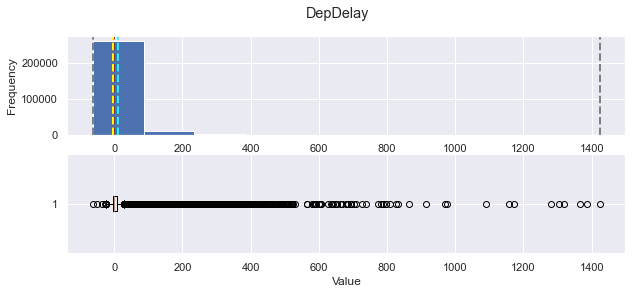

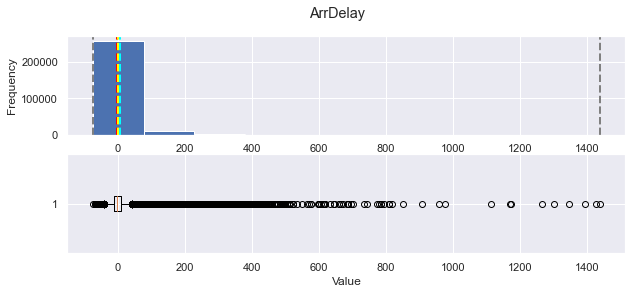

In [10]:
# checking for outliers
# Function to show summary stats and distribution for a column
def show_distribution(var_data):
    

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(var_data.name,'\nMinimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(var_data.name)

    # Show the figure
    fig.show()

# Call the function for each delay field
delayFields = ['DepDelay','ArrDelay']
for col in delayFields:
    show_distribution(data[col])

#### There are outliers at the lower and upper end of each distribution, it is safe to trim by 1st and 90th percentile

DepDelay 
Minimum:-11.00
Mean:-0.92
Median:-2.00
Mode:-3.00
Maximum:16.00

ArrDelay 
Minimum:-32.00
Mean:-5.03
Median:-6.00
Mode:0.00
Maximum:37.00



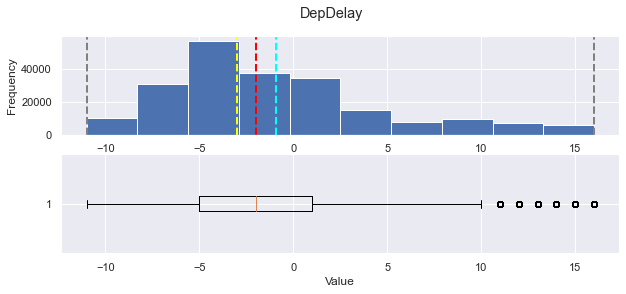

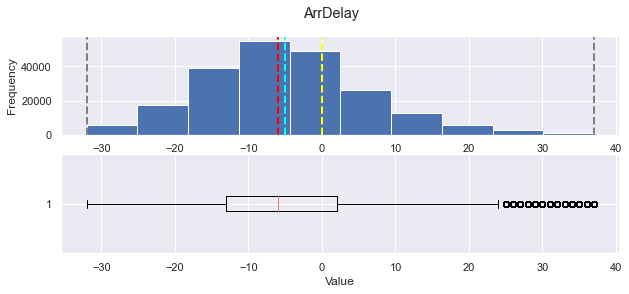

In [11]:
# Trim outliers for ArrDelay based on 1% and 90% percentiles
ArrDelay_01pcntile = data.ArrDelay.quantile(0.01)
ArrDelay_90pcntile = data.ArrDelay.quantile(0.90)
data = data[data.ArrDelay < ArrDelay_90pcntile]
data = data[data.ArrDelay > ArrDelay_01pcntile]

# Trim outliers for DepDelay based on 1% and 90% percentiles
DepDelay_01pcntile = data.DepDelay.quantile(0.01)
DepDelay_90pcntile = data.DepDelay.quantile(0.90)
data = data[data.DepDelay < DepDelay_90pcntile]
data = data[data.DepDelay > DepDelay_01pcntile]

# View the revised distributions
for col in delayFields:
    show_distribution(data[col])

#### Thats good

## Explore the cleaned data

In [12]:
# view summary statistics for the numeric fields
data.describe()

Year          Month     DayofMonth      DayOfWeek  OriginAirportID  \
count  214397.0  214397.000000  214397.000000  214397.000000    214397.000000   
mean     2013.0       7.018368      15.794703       3.902737     12757.827661   
std         0.0       2.006398       8.859118       1.997744      1510.058629   
min      2013.0       4.000000       1.000000       1.000000     10140.000000   
25%      2013.0       5.000000       8.000000       2.000000     11292.000000   
50%      2013.0       7.000000      16.000000       4.000000     12892.000000   
75%      2013.0       9.000000      23.000000       6.000000     14100.000000   
max      2013.0      10.000000      31.000000       7.000000     15376.000000   

       DestAirportID     CRSDepTime       DepDelay       DepDel15  \
count  214397.000000  214397.000000  214397.000000  211636.000000   
mean    12726.276147    1278.223879      -0.921692       0.018352   
std      1506.251757     469.440262       5.708594       0.134222   
min     10140.000000       1.000000     -11.000000       0.000000   
25%     11292.000000     850.000000      -5.000000       0.000000   
50%     12892.000000    1235.000000      -2.000000       0.000000   
75%     14057.000000    1655.000000       1.000000       0.000000   
max     15376.000000    2359.000000      16.000000       1.000000   

          CRSArrTime       ArrDelay       ArrDel15      Cancelled  
count  214397.000000  214397.000000  214397.000000  214397.000000  
mean     1461.406596      -5.030276       0.068602       0.013228  
std       485.676457      11.424280       0.252776       0.114249  
min         1.000000     -32.000000       0.000000       0.000000  
25%      1054.000000     -13.000000       0.000000       0.000000  
50%      1445.000000      -6.000000       0.000000       0.000000  
75%      1845.000000       2.000000       0.000000       0.000000  
max      2359.000000      37.000000       1.000000       1.000000

#### OriginAirportID and DestAirportID seems to be pretty close

<AxesSubplot:xlabel='DepDelay', ylabel='count'>

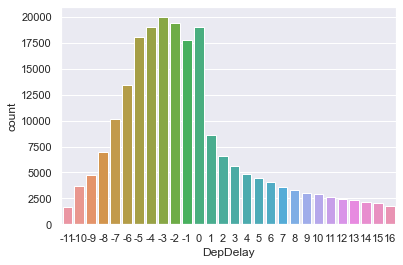

In [13]:
# To determine the distribution of DepDelay and ArrDelay 

# For DepDelay 
sns.countplot(data['DepDelay'])


<AxesSubplot:xlabel='ArrDelay', ylabel='count'>

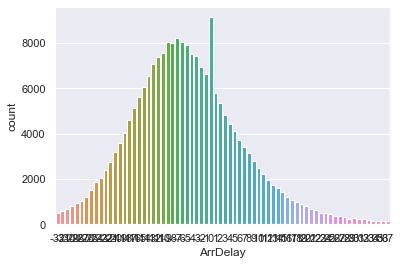

In [14]:

# For ArrDelay
sns.countplot(data['ArrDelay'])

In [15]:
# Average(mean)departure delay
mean_departure = data['DepDelay'].mean()
print('The mean departure delays :',mean_departure)

The mean departure delays : -0.9216920012873314


In [16]:
# Average(mean)arrival delay
mean_arrival = data['ArrDelay'].mean()
print('The mean arrival delays :',mean_arrival)

The mean arrival delays : -5.030275610199769


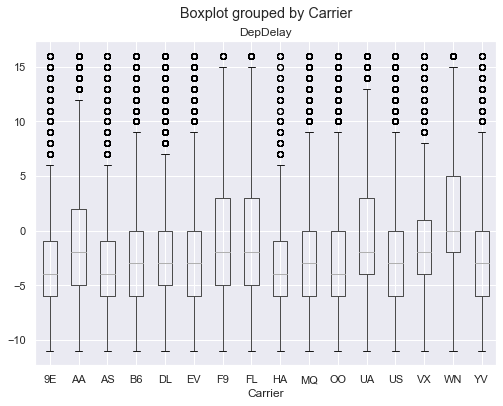

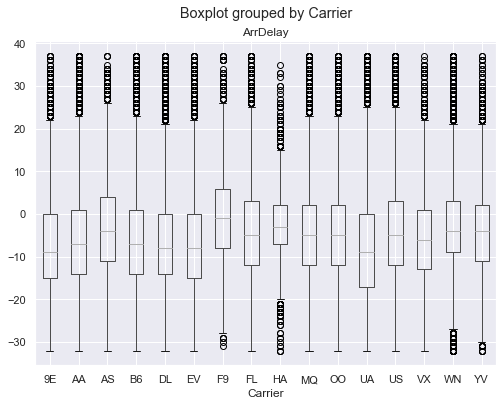

In [17]:
# To visualize how carriers
for col in delayFields:
    data.boxplot( by='Carrier',column=col,figsize=(8,6))

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DayOfWeek'>

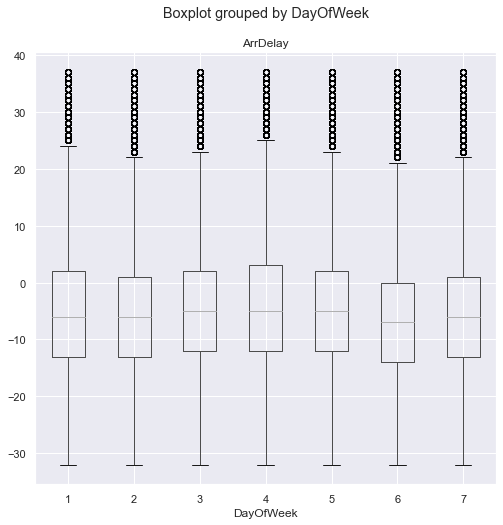

In [18]:
## To visualize the notable difference in arrival delays for different days of the week
data.boxplot( by='DayOfWeek',column=col,figsize=(8,8))

DepDelay
OriginAirportName                            
Chicago Midway International         2.365960
Dallas Love Field                    2.148798
William P Hobby                      1.561927
Metropolitan Oakland International   0.964853
Denver International                 0.807272
...                                       ...
Memphis International               -2.962737
Tucson International                -2.989154
Ted Stevens Anchorage International -3.149758
Richmond International              -3.198073
Long Beach Airport                  -3.447844

[70 rows x 1 columns]

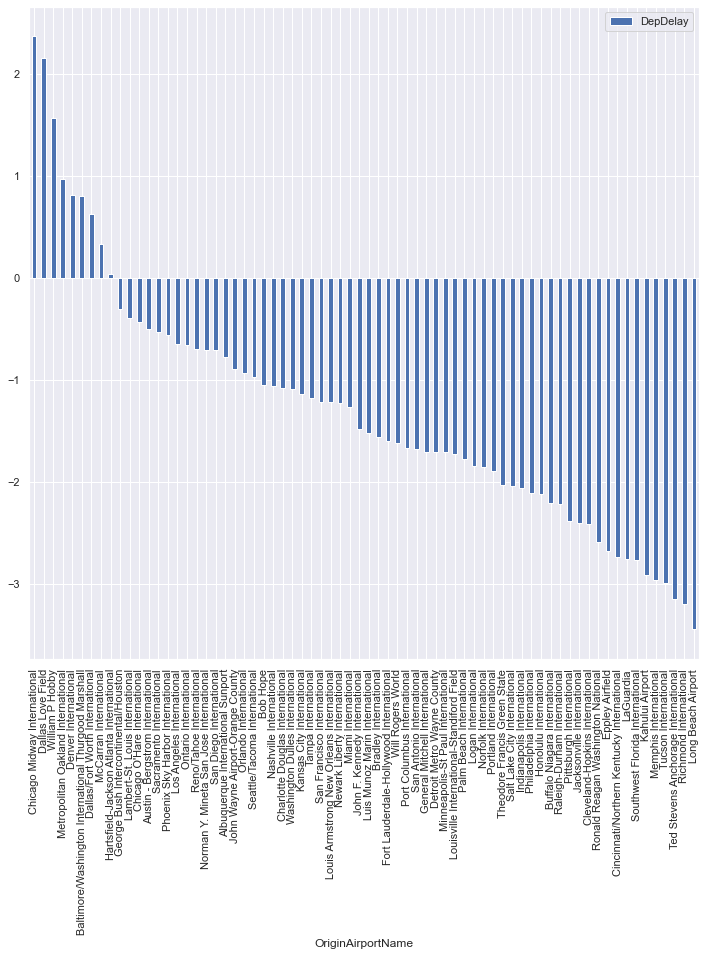

In [19]:
# Which departure airport has the highest average departure delay?
departure_airport_group = data.groupby(data['OriginAirportName'])

mean_departure_delays = pd.DataFrame(departure_airport_group['DepDelay'].mean()).sort_values('DepDelay', ascending=False)
mean_departure_delays.plot(kind = "bar", figsize=(12,12))
mean_departure_delays

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DepDel15'>

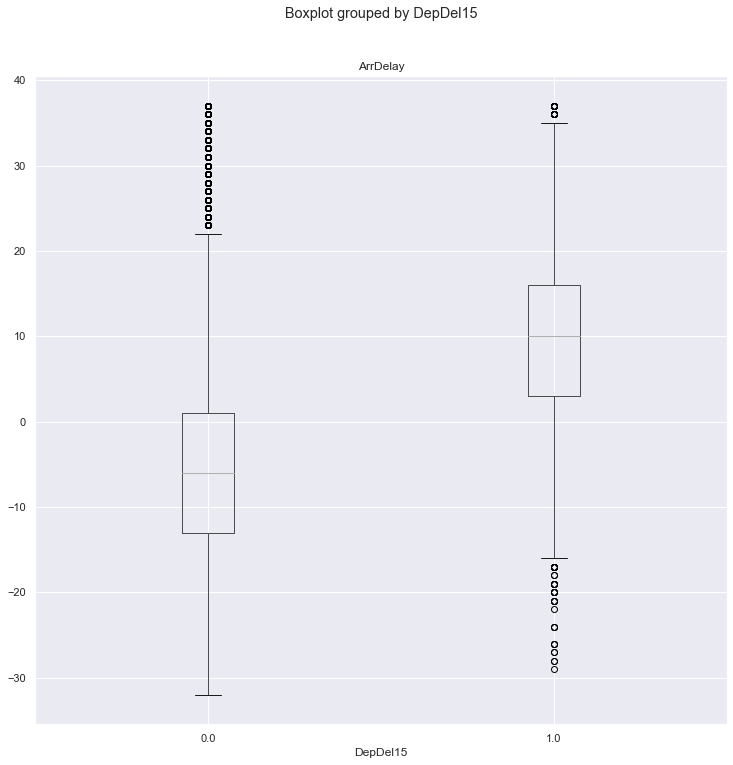

In [20]:
# Do late departures tend to result in longer arrival delays than on-time departures?
data.boxplot(column='ArrDelay', by='DepDel15', figsize=(12,12))

In [21]:
# Which route has the highest average arrival delay
routes = pd.Series(data['OriginAirportName'] + ' > ' + data['DestAirportName'])
data1 = pd.concat([data, routes.rename("Route")], axis=1)
route_group = data1.groupby(data1.Route)
pd.DataFrame(route_group['ArrDelay'].mean()).sort_values('ArrDelay', ascending=False)

ArrDelay
Route                                                        
Louis Armstrong New Orleans International > Ron...  24.500000
Cleveland-Hopkins International > Palm Beach In...  18.000000
John F. Kennedy International > Louisville Inte...  18.000000
Cleveland-Hopkins International > Philadelphia ...  12.800000
Memphis International > Denver International         9.758621
...                                                       ...
Lambert-St. Louis International > Cleveland-Hop... -20.000000
Eppley Airfield > LaGuardia                        -20.750000
Denver International > Kahului Airport             -22.666667
Jacksonville International > Chicago Midway Int... -24.125000
Indianapolis International > Logan International   -26.000000

[2479 rows x 1 columns]

In [22]:
# Which route has the highest average arrival delay?
route_group = data1.groupby(data1.Route)
pd.DataFrame(route_group['ArrDelay'].mean()).sort_values('ArrDelay', ascending=False)

ArrDelay
Route                                                        
Louis Armstrong New Orleans International > Ron...  24.500000
Cleveland-Hopkins International > Palm Beach In...  18.000000
John F. Kennedy International > Louisville Inte...  18.000000
Cleveland-Hopkins International > Philadelphia ...  12.800000
Memphis International > Denver International         9.758621
...                                                       ...
Lambert-St. Louis International > Cleveland-Hop... -20.000000
Eppley Airfield > LaGuardia                        -20.750000
Denver International > Kahului Airport             -22.666667
Jacksonville International > Chicago Midway Int... -24.125000
Indianapolis International > Logan International   -26.000000

[2479 rows x 1 columns]

In [23]:
data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier',
       'OriginAirportID', 'OriginAirportName', 'OriginCity', 'OriginState',
       'DestAirportID', 'DestAirportName', 'DestCity', 'DestState',
       'CRSDepTime', 'DepDelay', 'DepDel15', 'CRSArrTime', 'ArrDelay',
       'ArrDel15', 'Cancelled'],
      dtype='object')

# Machine Learning Algorithm

In [24]:
# Preparing the training and testing dataset
data.shape

# splitting into train test
train = data.loc[:149999,:]
test = data.loc[150000:,:]

# check out
print(train.shape,test.shape)

(118125, 20) (96272, 20)


In [25]:
# Define the features and labels
features = ['Month', 'DayofMonth', 'DayOfWeek', 'Carrier',
       'OriginAirportID', 'OriginAirportName', 'OriginCity', 'OriginState',
       'DestAirportID', 'DestAirportName', 'DestCity', 'DestState',
       'CRSDepTime', 'DepDelay',  'CRSArrTime', 'ArrDelay',
       'ArrDel15']
labels = ['Cancelled']
numeric_features = ['Month','DayofMonth','DayOfWeek','OriginAirportID','CRSDepTime','DepDelay','CRSArrTime','ArrDelay','ArrDel15']

In [26]:
# import relevant libraries for machine learning pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# train test split
X = train[numeric_features]
y = train[labels]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [ ]:
## define preprocessing for numeric features(scale them)
numeric_features = ['Month','DayofMonth','DayOfWeek','OriginAirportID','CRSDepTime','DepDelay','CRSArrTime','ArrDelay','ArrDel15']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])


## define preprocessing for categorical features(encode them)
categorical_features = ['Carrier','OriginAirportName','OriginCity','OriginState','DestAirportName','DestCity','DestState',]
categorical_transformer = Pipeline(steps=[
    ('label', LabelEncoder())])


## amalgamate preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


## create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier())])

## fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train,y_train)
print (PIPEmodelLR)

# LOGR

In [29]:
LRmodel = LogisticRegression()

In [30]:
LRmodel.fit(X_train,y_train)

LogisticRegression()

In [32]:
# Evaluation Metrics
LRpredictions = LRmodel.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, LRpredictions))
print(classification_report(y_test, LRpredictions))
# Print the confusion matrix
cm = confusion_matrix(y_test, LRpredictions)
print (cm)

Accuracy:  0.9869631469044529
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     34976
           1       0.00      0.00      0.00       462

    accuracy                           0.99     35438
   macro avg       0.49      0.50      0.50     35438
weighted avg       0.97      0.99      0.98     35438

[[34976     0]
 [  462     0]]


In [33]:
LRprobab = LRmodel.predict_proba(X_test)

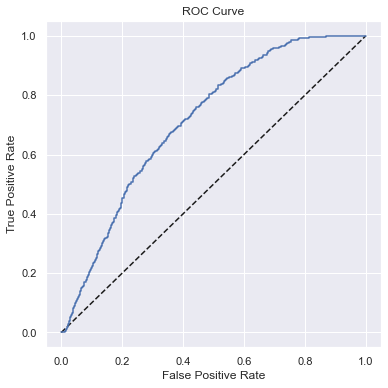

In [35]:
from sklearn.metrics import roc_curve

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, LRprobab[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [36]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,LRprobab[:,1])
print('AUC: ' + str(auc))

AUC: 0.713317703568161


# DTC

In [27]:
DTCmodel = DecisionTreeClassifier()

In [28]:
DTCmodel.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
# Evaluation Metrics
DTCpredictions = DTCmodel.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, DTCpredictions))
print(classification_report(y_test, DTCpredictions))
# Print the confusion matrix
cm = confusion_matrix(y_test, DTCpredictions)
print (cm)

Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34976
           1       1.00      1.00      1.00       462

    accuracy                           1.00     35438
   macro avg       1.00      1.00      1.00     35438
weighted avg       1.00      1.00      1.00     35438

[[34976     0]
 [    0   462]]


In [30]:
DTCprobab = DTCmodel.predict_proba(X_test)

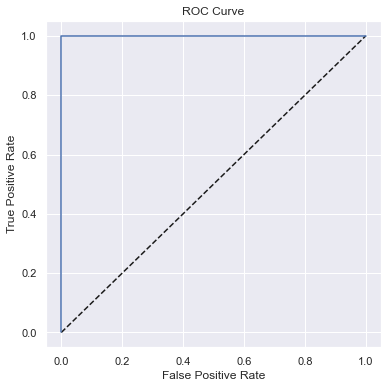

In [31]:
from sklearn.metrics import roc_curve

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, DTCprobab[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Saving the best performing model

In [34]:
import joblib

# creating the file directory
filename = './Model.pkl'
joblib.dump(DTCmodel,filename)

['./Model.pkl']